In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [30]:
cd data/

/Users/marijansoric/Documents/GitHub/Solar-Energy-Production-Forecasting/data


In [4]:
pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 6.0 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.3/911.3 kB 8.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 11.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 10.4 MB/s eta 0:00:0000:0100:01
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4
Note: you may need to restart the kernel to use updated packages.


In [31]:
# Train
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

In [32]:
# X_train_estimated
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')

In [33]:
# X_train_observed
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')

In [34]:
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')

In [39]:
pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 5.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 2.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 5.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.0/653.0 kB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 8.3 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 7.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 9.1 MB/s eta 0:00:00:00:0100:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=9d4a655207766149158126bf106d2ee26102fd6290ad49333357bed0f39ba2ef
  Stored in directory: /Users/marijansoric/Library/Caches/pip/wheels/ab/a0/78/885e94cd7af32ff1

In [6]:
from ydata_profiling import ProfileReport

profile = ProfileReport(X_train_estimated_a, title="Profiling Report")

In [9]:
profile.to_file("Marijan.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
train_a.to_csv('y_a.csv')

In [41]:
(X_train_observed_a).set_index('date_forecast')

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
date_forecast,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-02 22:00:00,7.7,1.230,1744.900024,0.0,0.0,1744.900024,0.0,280.299988,0.0,0.0,0.0,0.0,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.0,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,NaN,0.0,0.0,-0.0,0.1,342.834015,-3.202000,0.0,285.899994,100.0,39640.101562,3.7,-3.6,-0.8,-0.0
2019-06-02 22:15:00,7.7,1.229,1734.000000,0.0,0.0,1734.000000,0.0,280.299988,0.0,0.0,0.0,0.0,99.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.500000,0.0,0.0,993.900024,999.900024,0.0,0.0,72.199997,1006.000000,NaN,0.0,0.0,-0.0,0.2,346.294006,-3.650000,0.0,286.100006,100.0,40123.898438,3.6,-3.6,-0.6,-0.0
2019-06-02 22:30:00,7.7,1.228,1723.500000,0.0,0.0,1723.500000,0.0,280.299988,0.0,0.0,0.0,0.0,99.199997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.099976,0.0,0.0,993.599976,999.599976,0.0,0.0,71.199997,1005.599976,NaN,0.0,0.0,-0.0,0.2,349.768005,-3.998000,0.0,286.299988,100.0,40628.300781,3.6,-3.6,-0.4,-0.0
2019-06-02 22:45:00,7.7,1.226,1713.400024,0.0,0.0,1713.400024,0.0,280.299988,0.0,0.0,0.0,0.0,99.400002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.799988,0.0,0.0,993.299988,999.299988,0.0,0.0,70.199997,1005.299988,NaN,0.0,0.0,-0.0,0.2,353.251007,-4.247000,0.0,286.600006,100.0,41153.601562,3.5,-3.5,-0.2,-0.0
2019-06-02 23:00:00,7.7,1.225,1703.599976,0.0,0.0,1703.599976,0.0,280.299988,0.0,0.0,0.0,0.0,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.500000,0.0,0.0,993.000000,999.000000,0.0,0.0,69.199997,1005.000000,NaN,0.0,0.0,-0.0,0.2,356.742004,-4.393000,0.0,286.799988,100.0,41699.898438,3.5,-3.5,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-21 00:00:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,2.800000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.400024,0.0,0.0,1005.500000,1011.799988,0.0,0.0,82.699997,1018.099976,NaN,0.0,0.0,-0.0,0.0,16.612000,-36.306000,0.0,276.899994,2.8,25791.000000,1.3,-0.4,1.2,-0.0
2022-10-21 00:15:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,2.300000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.299988,0.0,0.0,1005.400024,1011.700012,0.0,0.0,83.099998,1018.000000,NaN,0.0,0.0,-0.0,0.0,21.132999,-35.762001,0.0,276.799988,2.3,28560.599609,1.4,-0.6,1.2,-0.0
2022-10-21 00:30:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,1.700000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.200012,0.0,0.0,1005.299988,1011.599976,0.0,0.0,83.400002,1017.900024,NaN,0.0,0.0,-0.0,0.0,25.594000,-35.095001,0.0,276.600006,1.7,31317.800781,1.4,-0.8,1.2,-0.0


<AxesSubplot: ylabel='date_forecast'>

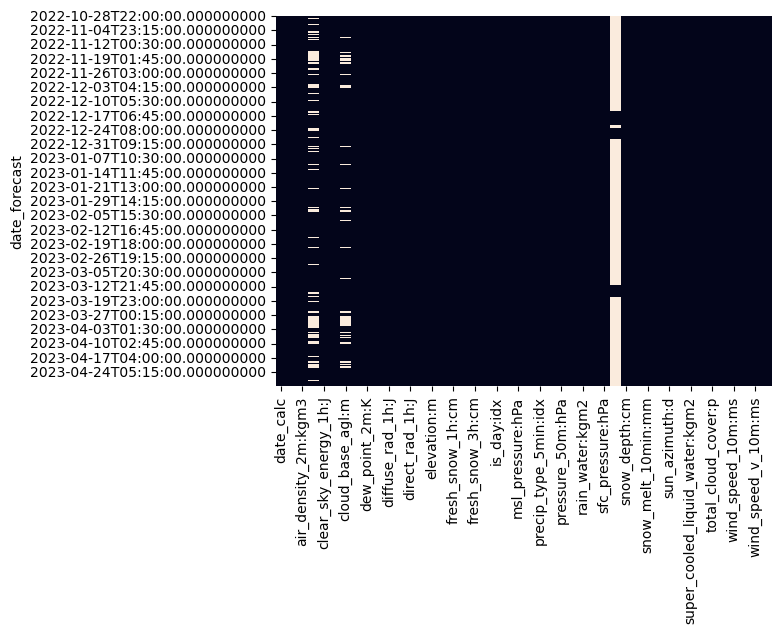

In [49]:
sns.heatmap(X_est.isna(),cbar=False)

<AxesSubplot: ylabel='date_forecast'>

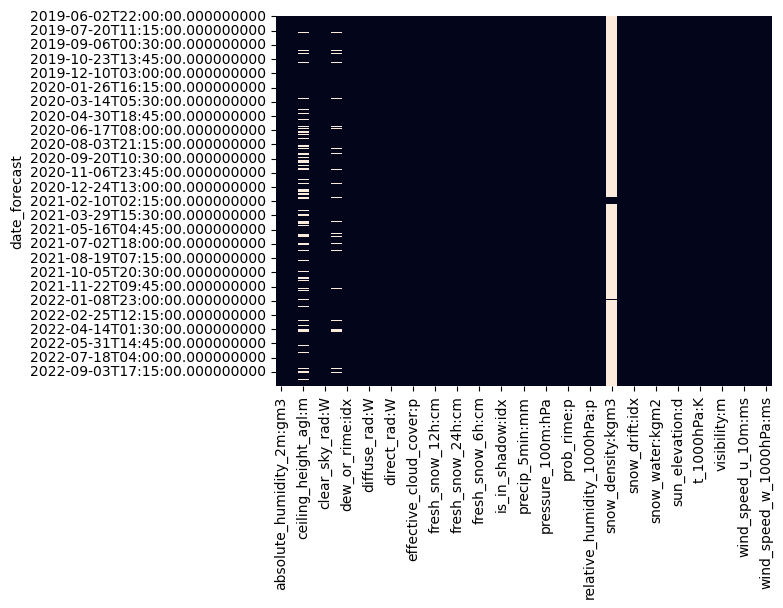

In [52]:
sns.heatmap(X_obs.isna(),cbar=False)

array([[<AxesSubplot: xlabel='date_forecast'>,
        <AxesSubplot: xlabel='date_forecast'>,
        <AxesSubplot: xlabel='date_forecast'>,
        <AxesSubplot: xlabel='date_forecast'>,
        <AxesSubplot: xlabel='date_forecast'>],
       [<AxesSubplot: xlabel='date_forecast'>,
        <AxesSubplot: xlabel='date_forecast'>,
        <AxesSubplot: xlabel='date_forecast'>,
        <AxesSubplot: xlabel='date_forecast'>,
        <AxesSubplot: xlabel='date_forecast'>],
       [<AxesSubplot: xlabel='date_forecast'>,
        <AxesSubplot: xlabel='date_forecast'>,
        <AxesSubplot: xlabel='date_forecast'>,
        <AxesSubplot: xlabel='date_forecast'>,
        <AxesSubplot: xlabel='date_forecast'>],
       [<AxesSubplot: xlabel='date_forecast'>,
        <AxesSubplot: xlabel='date_forecast'>,
        <AxesSubplot: xlabel='date_forecast'>,
        <AxesSubplot: xlabel='date_forecast'>,
        <AxesSubplot: xlabel='date_forecast'>],
       [<AxesSubplot: xlabel='date_forecast'>,
        <

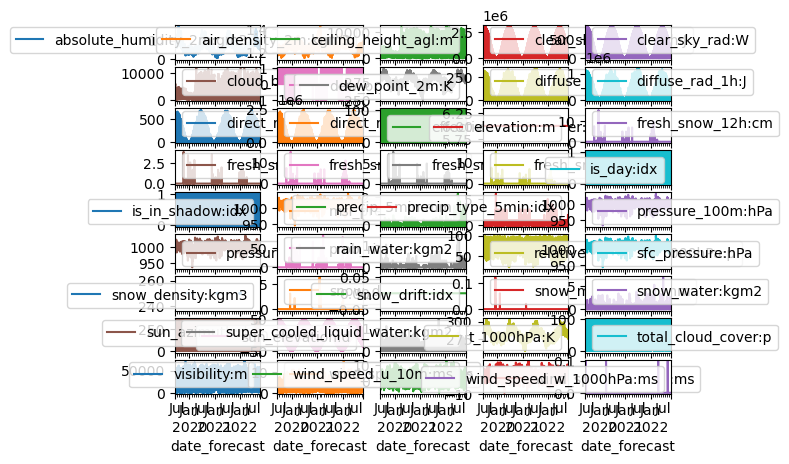

In [128]:
X_obs.plot(subplots=True, layout=(9,5))

In [126]:
X.max()

absolute_humidity_2m:gm3               17.500
air_density_2m:kgm3                     1.427
ceiling_height_agl:m                12328.500
clear_sky_energy_1h:J             3004692.800
clear_sky_rad:W                       834.800
cloud_base_agl:m                    11688.700
dew_or_rime:idx                         1.000
dew_point_2m:K                        293.800
diffuse_rad:W                         336.700
diffuse_rad_1h:J                  1182250.500
direct_rad:W                          684.300
direct_rad_1h:J                   2445832.500
effective_cloud_cover:p               100.000
elevation:m                             6.000
fresh_snow_12h:cm                      15.000
fresh_snow_1h:cm                        3.600
fresh_snow_24h:cm                      15.000
fresh_snow_3h:cm                        7.800
fresh_snow_6h:cm                       14.600
is_day:idx                              1.000
is_in_shadow:idx                        1.000
msl_pressure:hPa                  

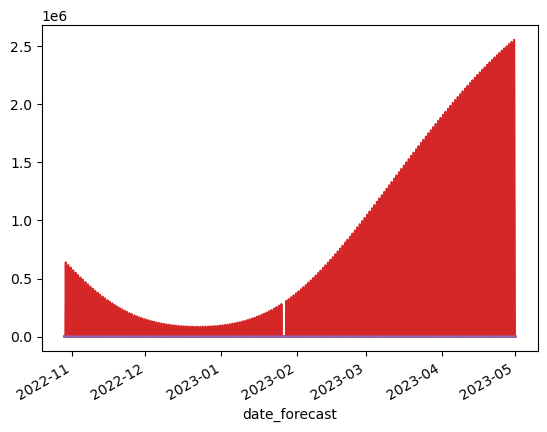

In [125]:
features = X_est.columns[1:]

for feature in features[:]:
    X_est[feature].plot()

<AxesSubplot: >

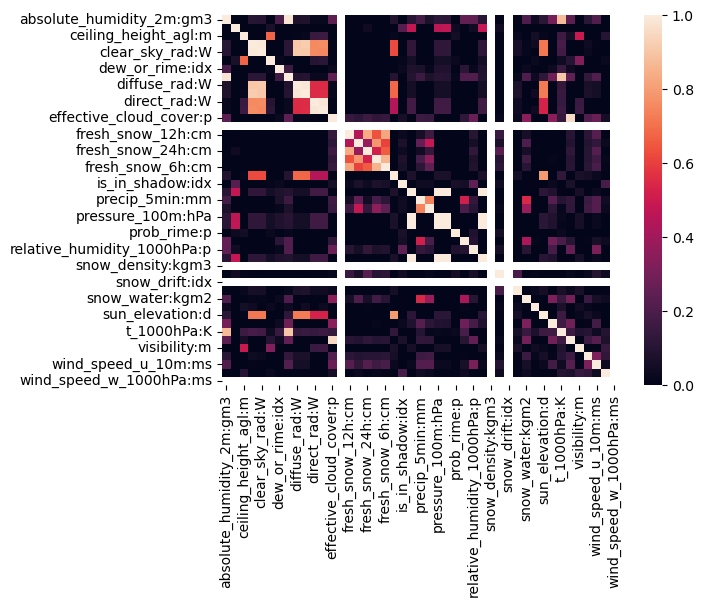

In [79]:
sns.heatmap(X_est.drop('date_calc', axis=1).corr(), vmin=0, vmax=1)#, annot=True)

In [122]:
X.drop(['pv_measurement'], axis=1).corr()<

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
absolute_humidity_2m:gm3,1.000000,-0.803326,0.076754,0.352669,0.349790,0.020805,0.122575,0.974811,0.285767,0.291530,0.240221,0.244153,0.021417,NaN,-0.118776,-0.068740,-0.148366,-0.084930,-0.098726,0.306243,-0.318807,0.147742,0.066528,-0.020847,0.165235,0.154298,-0.056014,0.259310,0.160696,0.143369,NaN,-0.203651,NaN,-0.014042,0.033415,0.023750,0.432066,0.107140,0.899403,0.042977,-0.157191,-0.156987,0.050194,-0.256651,0.002927
air_density_2m:kgm3,-0.803326,1.000000,-0.149976,-0.474399,-0.463730,-0.118813,-0.058673,-0.838085,-0.403882,-0.416646,-0.396005,-0.410888,-0.066099,NaN,0.062341,0.043633,0.074660,0.052358,0.058248,-0.387462,0.400142,0.280090,-0.081588,-0.013175,0.263772,0.275671,0.072178,-0.161855,0.142590,0.287497,NaN,0.316647,NaN,0.014537,-0.063243,-0.064139,-0.504546,-0.061943,-0.914845,-0.100941,-0.011992,-0.017662,0.025952,0.141692,0.003173
ceiling_height_agl:m,0.076754,-0.149976,1.000000,0.087360,0.079520,0.706390,0.043554,0.066227,0.097953,0.101989,0.271475,0.281170,-0.348479,NaN,-0.009282,-0.003529,-0.015660,-0.006524,-0.007522,0.051805,-0.057078,0.070416,0.001550,-0.046818,0.074072,0.071997,0.001681,-0.151619,-0.400662,0.069879,NaN,-0.057617,NaN,-0.030849,-0.170565,0.057474,0.079050,-0.330302,0.232093,0.030325,0.426252,-0.160138,-0.311788,0.000645,-0.000295
clear_sky_energy_1h:J,0.352669,-0.474399,0.087360,1.000000,0.992331,0.052849,-0.081113,0.361910,0.913991,0.923551,0.722851,0.733839,0.003392,NaN,-0.056937,-0.037781,-0.072858,-0.046831,-0.053043,0.650362,-0.692375,0.157719,-0.008976,-0.029600,0.160352,0.154114,-0.050674,0.054826,-0.339987,0.147875,NaN,-0.074666,NaN,-0.020500,-0.037108,0.038372,0.847857,0.016787,0.439300,0.010458,0.091826,0.013464,0.069669,-0.340359,-0.005202
clear_sky_rad:W,0.349790,-0.463730,0.079520,0.992331,1.000000,0.048901,-0.080447,0.359033,0.920057,0.915877,0.730378,0.730008,0.003844,NaN,-0.055355,-0.037536,-0.072678,-0.046207,-0.052124,0.650762,-0.696093,0.158364,-0.009752,-0.029515,0.160682,0.154595,-0.050452,0.052756,-0.313426,0.148505,NaN,-0.074184,NaN,-0.020468,-0.039407,-0.015973,0.851628,0.017578,0.425132,0.010226,0.082866,0.003589,0.064025,-0.325320,-0.007277
cloud_base_agl:m,0.020805,-0.118813,0.706390,0.052849,0.048901,1.000000,0.037569,0.011512,0.036535,0.040458,0.234547,0.241771,-0.329153,NaN,-0.006881,-0.003691,-0.007437,-0.006798,-0.008928,0.016528,-0.019476,0.038796,-0.022395,-0.070958,0.042157,0.040453,0.021426,-0.111394,-0.453720,0.038711,NaN,-0.057937,NaN,-0.018717,-0.117254,0.046501,0.035930,-0.262091,0.198188,-0.071687,0.453645,-0.191220,-0.392595,0.057235,-0.001230
dew_or_rime:idx,0.122575,-0.058673,0.043554,-0.081113,-0.080447,0.037569,1.000000,0.122914,-0.081409,-0.083184,-0.056226,-0.057131,-0.050966,NaN,-0.010774,-0.010881,-0.013471,-0.010683,-0.011769,-0.103758,0.101198,0.006677,-0.010952,-0.018203,0.010445,0.009503,-0.162775,-0.007454,0.100930,0.008596,NaN,-0.015377,NaN,-0.003935,-0.022695,-0.032112,-0.073038,-0.036991,0.108185,-0.033963,-0.030082,-0.108904,-0.039055,0.004990,-0.001832
dew_point_2m:K,0.974811,-0.838085,0.066227,0.361910,0.359033,0.011512,0.122914,1.000000,0.297785,0.303535,0.246408,0.250556,0.058611,NaN,-0.126135,-0.075679,-0.155511,-0.092707,-0.106614,0.312253,-0

In [113]:
X = pd.merge(X_obs, y, left_index=True, right_index=True)

<AxesSubplot: >

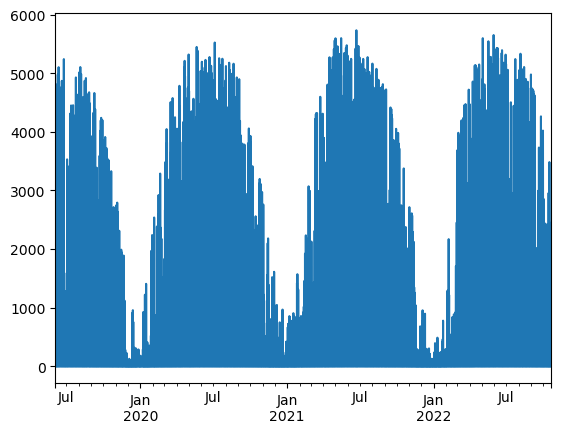

In [118]:
X.pv_measurement.plot()

<AxesSubplot: >

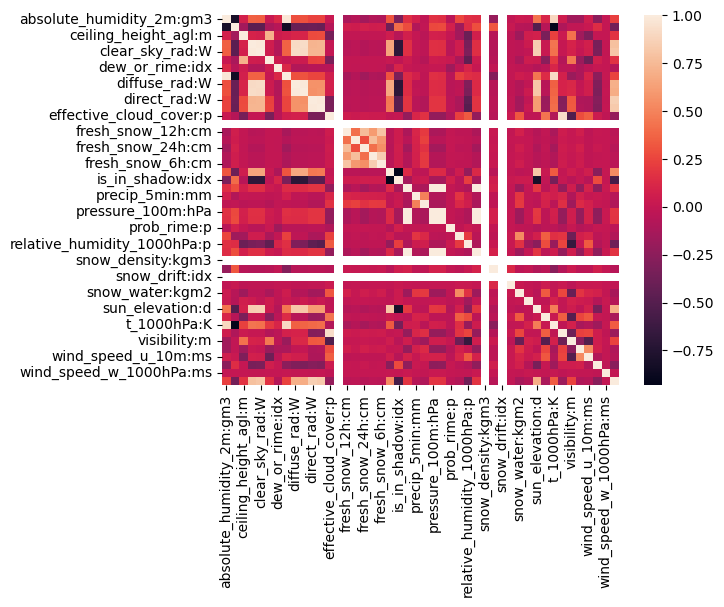

In [116]:
sns.heatmap(X.corr())

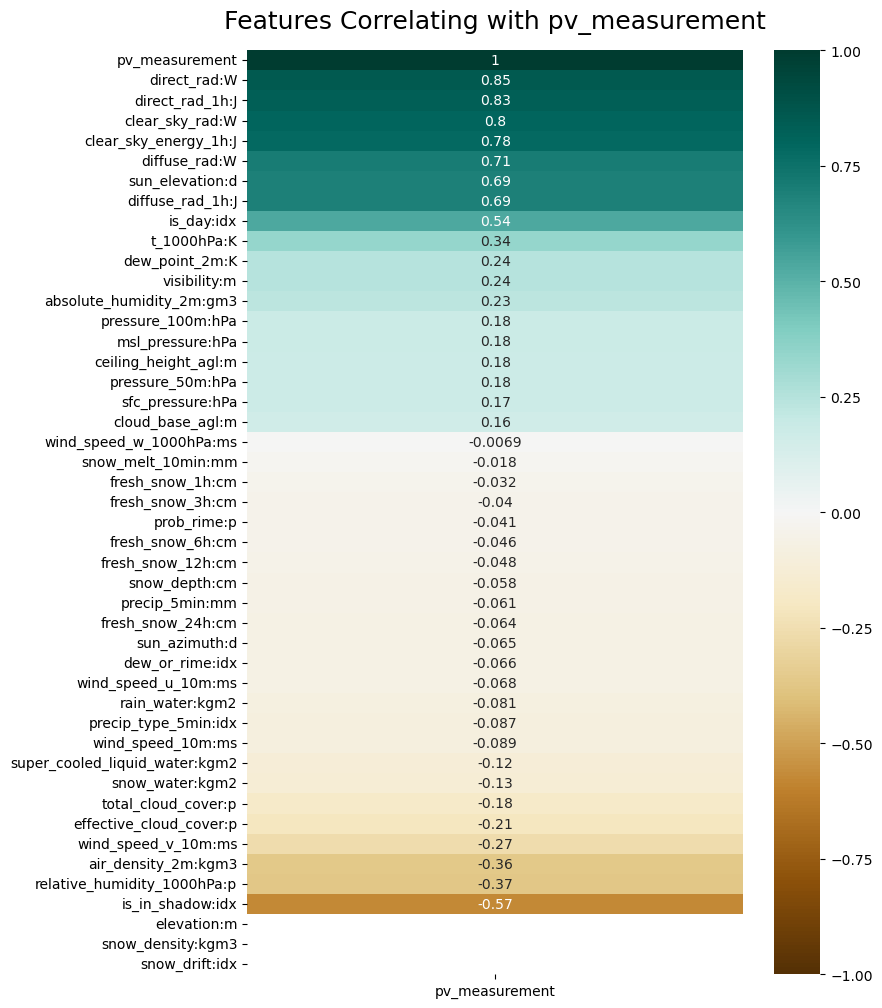

In [119]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(X.corr()[['pv_measurement']].sort_values(by='pv_measurement', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with pv_measurement', fontdict={'fontsize':18}, pad=16);

In [36]:
X_train_estimated_a

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.4,1.233,1425.099976,0.0,0.0,1211.699951,1.0,281.399994,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.0,0.0,988.500000,994.500000,0.0,0.0,92.699997,1000.599976,NaN,0.0,0.0,-0.0,0.4,340.799011,-38.466999,0.0,284.700012,100.000000,29429.699219,0.8,-0.4,0.7,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.4,1.233,2085.899902,0.0,0.0,1560.500000,1.0,281.299988,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.799988,0.0,0.0,988.200012,994.200012,0.0,0.1,92.699997,1000.299988,NaN,0.0,0.0,-0.0,0.4,345.451996,-38.955002,0.0,284.700012,100.000000,23604.099609,0.7,-0.4,0.7,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.233,2746.600098,0.0,0.0,1909.400024,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.400024,0.0,0.0,987.900024,993.900024,0.0,0.1,92.699997,1000.000000,NaN,0.0,0.0,-0.0,0.5,350.153015,-39.310001,0.0,284.700012,100.000000,17799.800781,0.7,-0.3,0.6,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.3,1.233,3407.399902,0.0,0.0,2258.199951,1.0,281.200012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.099976,0.0,0.0,987.599976,993.599976,0.0,0.1,92.599998,999.700012,NaN,0.0,0.0,-0.0,0.6,354.886993,-39.528999,0.0,284.600006,100.000000,12016.500000,0.6,-0.2,0.6,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.233,4068.199951,0.0,0.0,2607.000000,1.0,281.100006,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.799988,0.0,0.0,987.299988,993.299988,0.0,0.1,92.599998,999.299988,NaN,0.0,0.0,-0.0,0.6,359.638000,-39.609001,0.0,284.600006,100.000000,6254.399902,0.6,-0.1,0.6,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17571,2023-04-29 07:00:05,2023-04-30 22:45:00,4.5,1.281,1173.900024,0.0,0.0,536.500000,0.0,272.299988,0.0,0.0,0.0,0.0,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.299988,0.0,0.0,1001.099976,1007.400024,0.0,0.0,79.599998,1013.700012,NaN,0.0,0.0,-0.0,0.1,352.920013,-11.731000,0.1,274.200012,99.900002,11629.299805,3.9,2.9,2.5,-0.0
17572,2023-04-29 07:00:05,2023-04-30 23:00:00,4.5,1.281,1054.199951,0.0,0.0,542.400024,0.0,272.200012,0.0,0.0,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.299988,0.0,0.0,1001.099976,1007.299988,0.0,0.0,80.000000,1013.599976,NaN,0.0,0.0,-0.0,0.1,356.634003,-11.884000,0.1,274.200012,100.000000,9923.200195,3.7,2.8,2.4,-0.0
17573,2023-04-29 07:00:05,2023-04-30 23:15:00,4.5,1.281,1435.800049,0.0,0.0,531.799988,0.0,272.299988,0.0,0.0,0.0,0.0,99.400002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.099976,0.0,0.0,1000.900024,1007.200012,0.0,0.0,79.900002,1013.500000,NaN,0.0,0.0,-0.0,0.1,0.352000,-11.928000,0.1,274.200012,99.900002,11230.799805,3.7,2.7,2.5,-0.0
17574,2023-04-29 07:00:05,2023-04-30 23:30:00,4.5,1.281,1817.400024,0.0,0.0,521.200012,0.0,272.299988,0.0,0.0,0.0,0.0,98.099998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.000000,0.0,0.0,1000.799988,1007.000000,0.0,0.0,79.800003,1013.299988,NaN,0.0,0.0,-0.0,0.0,4.070000,-11.864000,0.1,274.200012,99.599998,12526.099609,3.8,2.7,2.6,-0.0


In [2]:
y = pd.read_csv('y_a.csv', index_col='time', parse_dates=True)
X_est = pd.read_csv('X_est.csv', index_col='date_forecast', parse_dates=True)
X_obs = pd.read_csv('X_obs.csv', index_col='date_forecast', parse_dates=True)

y.drop(['Unnamed: 0'], axis=1, inplace=True)
X_est.drop(['Unnamed: 0'], axis=1, inplace=True)
X_obs.drop(['Unnamed: 0'], axis=1, inplace=True)

In [93]:
print(X_est.index)
X_obs.index

DatetimeIndex(['2022-10-28 22:00:00', '2022-10-28 22:15:00',
               '2022-10-28 22:30:00', '2022-10-28 22:45:00',
               '2022-10-28 23:00:00', '2022-10-28 23:15:00',
               '2022-10-28 23:30:00', '2022-10-28 23:45:00',
               '2022-10-29 00:00:00', '2022-10-29 00:15:00',
               ...
               '2023-04-30 21:30:00', '2023-04-30 21:45:00',
               '2023-04-30 22:00:00', '2023-04-30 22:15:00',
               '2023-04-30 22:30:00', '2023-04-30 22:45:00',
               '2023-04-30 23:00:00', '2023-04-30 23:15:00',
               '2023-04-30 23:30:00', '2023-04-30 23:45:00'],
              dtype='datetime64[ns]', name='date_forecast', length=17576, freq=None)


DatetimeIndex(['2019-06-02 22:00:00', '2019-06-02 22:15:00',
               '2019-06-02 22:30:00', '2019-06-02 22:45:00',
               '2019-06-02 23:00:00', '2019-06-02 23:15:00',
               '2019-06-02 23:30:00', '2019-06-02 23:45:00',
               '2019-06-03 00:00:00', '2019-06-03 00:15:00',
               ...
               '2022-10-20 22:45:00', '2022-10-20 23:00:00',
               '2022-10-20 23:15:00', '2022-10-20 23:30:00',
               '2022-10-20 23:45:00', '2022-10-21 00:00:00',
               '2022-10-21 00:15:00', '2022-10-21 00:30:00',
               '2022-10-21 00:45:00', '2022-10-21 01:00:00'],
              dtype='datetime64[ns]', name='date_forecast', length=118669, freq=None)

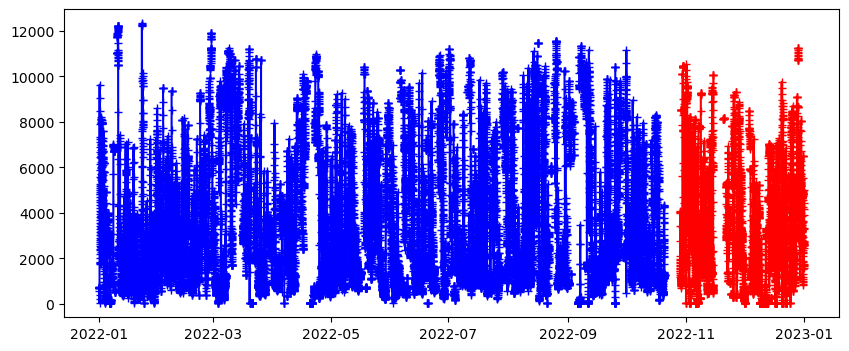

In [3]:
fig = plt.figure()
fig.set_size_inches(10, 4)
# Tracer le premier graphique dans la première colonne
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_est['ceiling_height_agl:m'].loc['2022'], color='r',marker='+')
ax.plot(X_obs['ceiling_height_agl:m'].loc['2022'], color='b',marker='+')

<AxesSubplot: xlabel='date_forecast'>

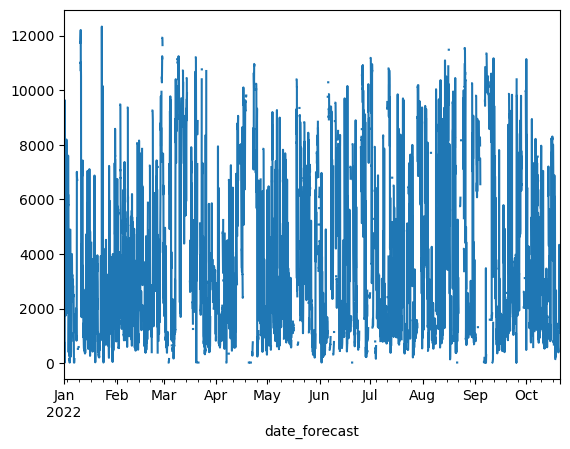

In [67]:
.plot()

<AxesSubplot: xlabel='time'>

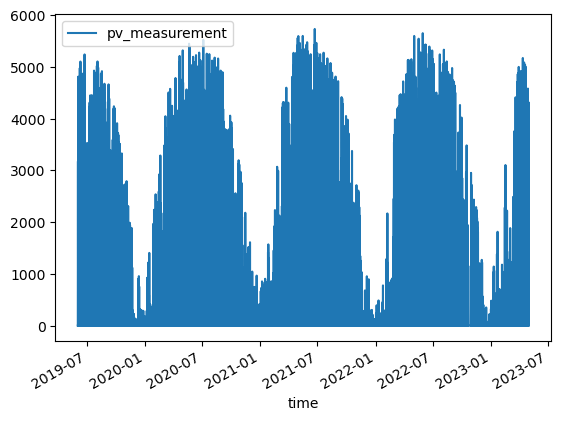

In [104]:
y.loc[:].plot()

<AxesSubplot: xlabel='time'>

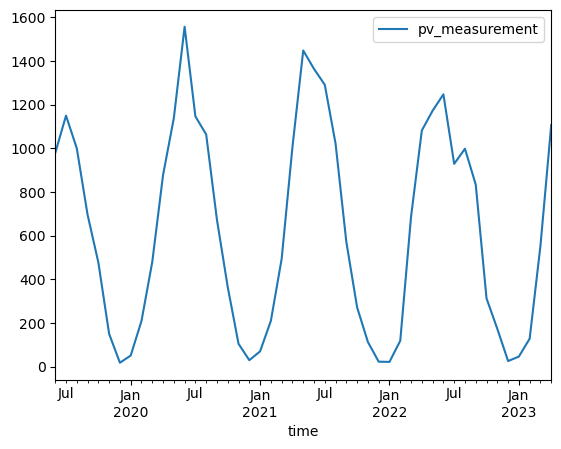

In [105]:
#y.resample('Y').mean().plot()
y.resample('M').mean().plot()

<Figure size 1200x800 with 0 Axes>

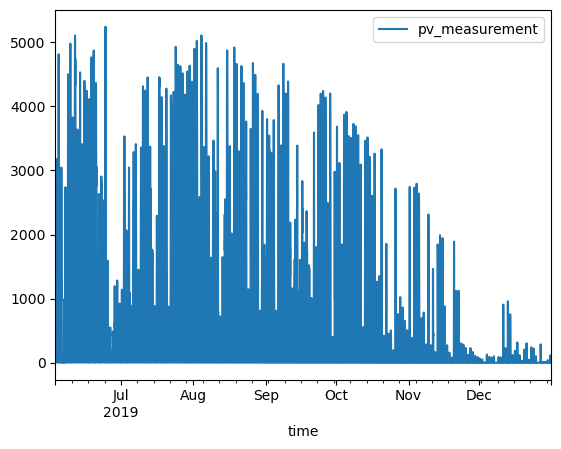

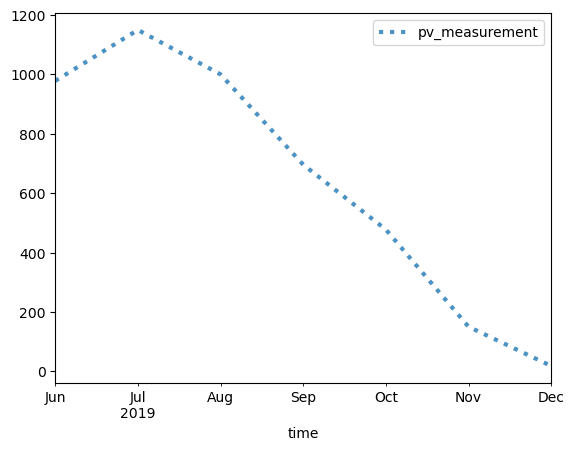

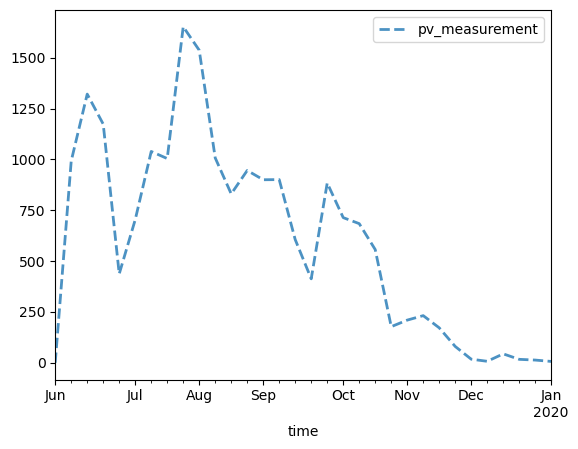

In [32]:
plt.figure(figsize=(12, 8))
y.loc['2019'].plot()
y.loc['2019'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
y.loc['2019'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

<AxesSubplot: xlabel='time'>

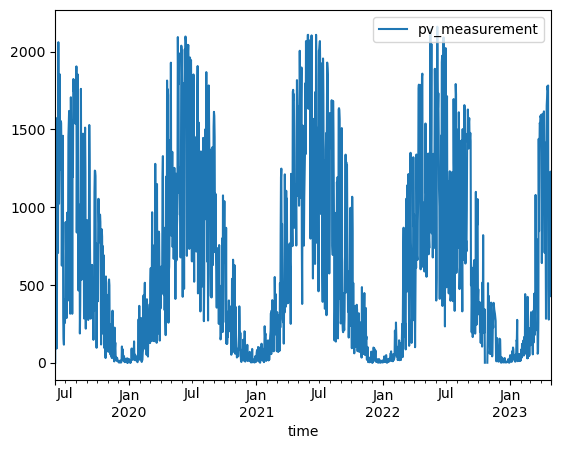

In [15]:
y.resample('d').mean().plot()

In [24]:
pd.merge(X_est, X_obs)

,date_calc,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms


In [23]:
X_est.index

DatetimeIndex(['2022-10-28 22:00:00', '2022-10-28 22:15:00',
               '2022-10-28 22:30:00', '2022-10-28 22:45:00',
               '2022-10-28 23:00:00', '2022-10-28 23:15:00',
               '2022-10-28 23:30:00', '2022-10-28 23:45:00',
               '2022-10-29 00:00:00', '2022-10-29 00:15:00',
               ...
               '2023-04-30 21:30:00', '2023-04-30 21:45:00',
               '2023-04-30 22:00:00', '2023-04-30 22:15:00',
               '2023-04-30 22:30:00', '2023-04-30 22:45:00',
               '2023-04-30 23:00:00', '2023-04-30 23:15:00',
               '2023-04-30 23:30:00', '2023-04-30 23:45:00'],
              dtype='datetime64[ns]', name='date_forecast', length=17576, freq=None)

In [21]:
X_obs

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
date_forecast,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-02 22:00:00,7.7,1.230,1744.9,0.0,0.0,1744.9,0.0,280.3,0.0,0.0,0.0,0.0,98.7,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.8,0.0,0.0,994.2,1000.3,0.0,0.0,73.1,1006.3,NaN,0.0,0.0,-0.0,0.1,342.834,-3.202,0.0,285.9,100.0,39640.1,3.7,-3.6,-0.8,-0.0
2019-06-02 22:15:00,7.7,1.229,1734.0,0.0,0.0,1734.0,0.0,280.3,0.0,0.0,0.0,0.0,99.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.5,0.0,0.0,993.9,999.9,0.0,0.0,72.2,1006.0,NaN,0.0,0.0,-0.0,0.2,346.294,-3.650,0.0,286.1,100.0,40123.9,3.6,-3.6,-0.6,-0.0
2019-06-02 22:30:00,7.7,1.228,1723.5,0.0,0.0,1723.5,0.0,280.3,0.0,0.0,0.0,0.0,99.2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.1,0.0,0.0,993.6,999.6,0.0,0.0,71.2,1005.6,NaN,0.0,0.0,-0.0,0.2,349.768,-3.998,0.0,286.3,100.0,40628.3,3.6,-3.6,-0.4,-0.0
2019-06-02 22:45:00,7.7,1.226,1713.4,0.0,0.0,1713.4,0.0,280.3,0.0,0.0,0.0,0.0,99.4,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.8,0.0,0.0,993.3,999.3,0.0,0.0,70.2,1005.3,NaN,0.0,0.0,-0.0,0.2,353.251,-4.247,0.0,286.6,100.0,41153.6,3.5,-3.5,-0.2,-0.0
2019-06-02 23:00:00,7.7,1.225,1703.6,0.0,0.0,1703.6,0.0,280.3,0.0,0.0,0.0,0.0,99.6,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.5,0.0,0.0,993.0,999.0,0.0,0.0,69.2,1005.0,NaN,0.0,0.0,-0.0,0.2,356.742,-4.393,0.0,286.8,100.0,41699.9,3.5,-3.5,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-21 00:00:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.7,0.0,0.0,0.0,0.0,2.8,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.4,0.0,0.0,1005.5,1011.8,0.0,0.0,82.7,1018.1,NaN,0.0,0.0,-0.0,0.0,16.612,-36.306,0.0,276.9,2.8,25791.0,1.3,-0.4,1.2,-0.0
2022-10-21 00:15:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.7,0.0,0.0,0.0,0.0,2.3,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.3,0.0,0.0,1005.4,1011.7,0.0,0.0,83.1,1018.0,NaN,0.0,0.0,-0.0,0.0,21.133,-35.762,0.0,276.8,2.3,28560.6,1.4,-0.6,1.2,-0.0
2022-10-21 00:30:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.7,0.0,0.0,0.0,0.0,1.7,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.2,0.0,0.0,1005.3,1011.6,0.0,0.0,83.4,1017.9,NaN,0.0,0.0,-0.0,0.0,25.594,-35.095,0.0,276.6,1.7,31317.8,1.4,-0.8,1.2,-0.0
